Below is a complete Python implementation of the (μ/μ, λ) Evolution Strategy using the Rastrigin function (a classic multi-modal optimization benchmark) that runs smoothly in Google Colab. This includes:

* Initialization

* Mutation

* Evaluation

* Selection

* Visualization

* Comments and docstrings for clarity

In [1]:
# Google Colab: Install if not available
!pip install numpy matplotlib --quiet


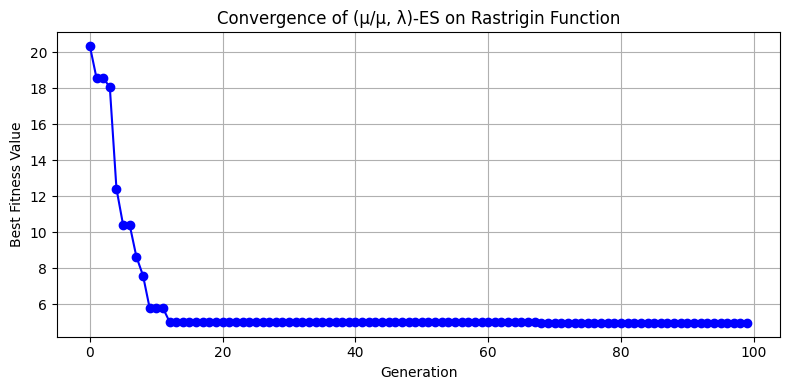

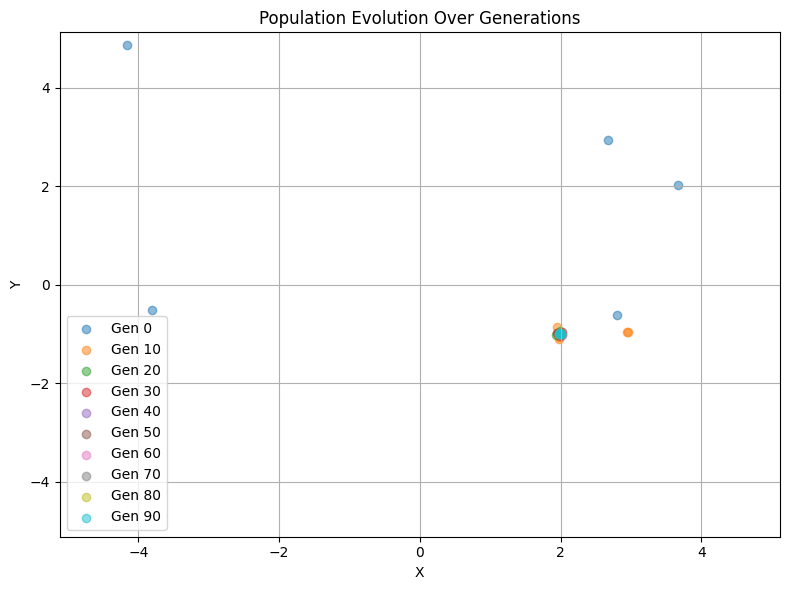

In [3]:
import numpy as np
import matplotlib.pyplot as plt

class RastriginFunction:
    """
    Represents the Rastrigin function used for multi-modal optimization.
    """
    def __init__(self, dimension: int):
        self.dimension = dimension

    def evaluate(self, x: np.ndarray) -> float:
        """
        Evaluate the Rastrigin function at a given point x.
        """
        A = 10
        return A * self.dimension + np.sum(x ** 2 - A * np.cos(2 * np.pi * x))


class EvolutionStrategyOptimizer:
    """
    Implements a (μ/μ, λ)-Evolution Strategy for optimizing multi-modal functions.
    """

    def __init__(self, mu=5, lmbda=20, dimension=2, generations=100,
                 sigma=0.5, bounds=(-5.12, 5.12), seed=None):
        """
        Initialize the optimizer with ES parameters.
        """
        self.mu = mu
        self.lmbda = lmbda
        self.dimension = dimension
        self.generations = generations
        self.sigma = sigma
        self.lower_bound, self.upper_bound = bounds
        self.rastrigin = RastriginFunction(dimension)
        self.rng = np.random.default_rng(seed)

        # Tracking history
        self.fitness_history = []
        self.population_history = []

    def initialize_population(self) -> np.ndarray:
        """
        Randomly initialize a population within the search space bounds.
        """
        return self.rng.uniform(self.lower_bound, self.upper_bound, (self.mu, self.dimension))

    def mutate(self, parent: np.ndarray) -> np.ndarray:
        """
        Generate an offspring from a parent using Gaussian mutation.
        """
        return parent + self.sigma * self.rng.normal(0, 1, self.dimension)

    def create_offspring(self, parents: np.ndarray) -> np.ndarray:
        """
        Create λ offspring from μ parents.
        """
        offspring = []
        for _ in range(self.lmbda):
            parent_idx = self.rng.integers(0, self.mu)
            child = self.mutate(parents[parent_idx])
            offspring.append(child)
        return np.array(offspring)

    def select_best_individuals(self, candidates: np.ndarray) -> np.ndarray:
        """
        Select μ best individuals based on fitness.
        """
        fitness_scores = np.array([self.rastrigin.evaluate(ind) for ind in candidates])
        sorted_indices = np.argsort(fitness_scores)
        self.fitness_history.append(fitness_scores[sorted_indices[0]])
        return candidates[sorted_indices[:self.mu]]

    def optimize(self):
        """
        Run the (μ/μ, λ) ES optimization process.
        """
        parents = self.initialize_population()

        for generation in range(self.generations):
            offspring = self.create_offspring(parents)
            combined = np.vstack((parents, offspring))
            self.population_history.append(parents.copy())
            parents = self.select_best_individuals(combined)

        return parents, self.fitness_history


def plot_fitness_convergence(fitness_history):
    """
    Plot the convergence of the best fitness value over generations.
    """
    plt.figure(figsize=(8, 4))
    plt.plot(fitness_history, marker='o', linestyle='-', color='blue')
    plt.xlabel("Generation")
    plt.ylabel("Best Fitness Value")
    plt.title("Convergence of (μ/μ, λ)-ES on Rastrigin Function")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def plot_population_evolution(history, bounds):
    """
    Scatter plot showing how the population evolves over generations.
    """
    plt.figure(figsize=(8, 6))
    for i, pop in enumerate(history[::len(history)//10]):  # Plot every ~10% generation
        x, y = pop[:, 0], pop[:, 1]
        plt.scatter(x, y, alpha=0.5, label=f"Gen {i*(len(history)//10)}")

    plt.xlim(bounds[0], bounds[1])
    plt.ylim(bounds[0], bounds[1])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Population Evolution Over Generations")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# === Run the optimizer ===
if __name__ == "__main__":
    es_optimizer = EvolutionStrategyOptimizer(mu=5, lmbda=20, dimension=2,
                                               generations=100, sigma=0.3,
                                               bounds=(-5.12, 5.12), seed=42)
    final_population, fitness_history = es_optimizer.optimize()

    # === Visualize results ===
    plot_fitness_convergence(fitness_history)
    plot_population_evolution(es_optimizer.population_history, bounds=(-5.12, 5.12))
